# Numerical optimization


- **Example 1: Consumption & labor supply**

    - Analytical solution (special case)
    - Numerical solution:
        - Grid search
        - Minimizer applied to objective function
        - Root-finder applied to first-order condition

- **Example 2: Consumption-savings choice**

    - Analytical solution
    - Numerical solution:

        - Minimizer applied to objective function
        - Root-finder applied to first-order condition (optional exercises)

## Consumption & labor supply

- Preferences:
    $$
    u(c,h) = 
    \underbrace{\frac{c^{1-\gamma} - 1}{1-\gamma}}_{\text{Utility from consumption}} 
    - 
    \underbrace{\psi \frac{h^{1+1/\theta}}{1+1/\theta}}_{\text{Disutility from work}}
    $$
- Special case for $\gamma = 1$:
    $$
    u(c,h) = \log(c) - \psi \frac{h^{1+1/\theta}}{1+1/\theta}
    $$
-  Budget constraint:
    $$
    c = a + w\cdot h
    $$
- Choice variables:

    -   $c$: Consumption
    -   $h$: Hours worked
- Parameters:

    -   $\gamma$: Relative risk aversion
    -   $\psi$: Weight on disutility of work
    -   $\theta$: Labor supply elasticity
    -   $a$: Initial assets
    -   $w$: Wage rate

- Household problem:
  $$
  \begin{aligned}
  \max_{c,~ h} \enskip& 
    \left\{\frac{c^{1-\gamma} - 1}{1-\gamma} - \psi \frac{h^{1+1/\theta}}{1+1/\theta} \right\}\\
    \text{subject to} \quad  c &= a + w\cdot h \\
        c &\geq 0\;, h \geq 0
  \end{aligned}
  $$

#### Plot utility components

Text(0.5, 1.0, 'Working disutility $\\psi\\frac{h^{1+1/\\theta}}{1+1/\\theta}$')

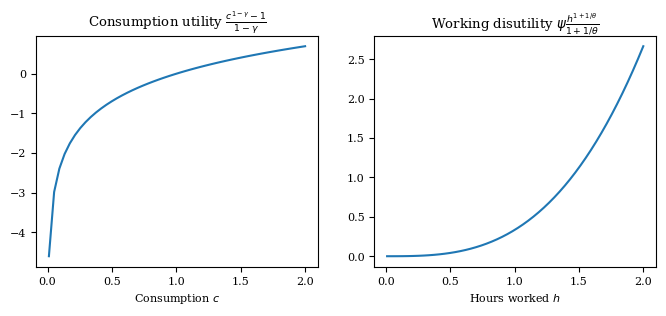

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
psi = 1
theta = 0.5

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 3))
xvalues = np.linspace(0.01, 2, 50)
# Assume gamma = 1 and hence log utility
ax0.plot(xvalues, np.log(xvalues))
ax0.set_xlabel(r'Consumption $c$')
ax0.set_title(r'Consumption utility $\frac{c^{1-\gamma}-1}{1-\gamma}$')
ax1.plot(xvalues, psi * xvalues**(1+1/theta)/(1+1/theta))
ax1.set_xlabel(r'Hours worked $h$')
ax1.set_title(r'Working disutility $\psi\frac{h^{1+1/\theta}}{1+1/\theta}$')


### Analytical solution

- From first-order conditions we get:
    $$
    \bigl(a + w\cdot h\bigr)^{-\gamma} = \psi \frac{h^{1/\theta}}{w}
    $$

- Special case with $a=0$:
    $$
    \begin{aligned}
    h &= \left[\frac{w^{1-\gamma}}{\psi}\right]^{\frac{1}{1/\theta + \gamma}} \\
    c &= w h
    \end{aligned}
    $$

### Numerical solution with grid search


#### Algorithm

1.  Define objective function
2.  Fix parameters
3.  Create candidate grid for $h$
4.  Obtain implied $c$ grid from budget constraint
5.  Evaluate utility for each point on grid
6.  Locate maximum

##### Part (1): Objective function

<div class="alert alert-info">
<h3> Your turn</h3>

Before we can locale the optimum numerically, we need to implement
a Python function which returns the utility associated with a choice 
vector <i>(c, h)</i>. 

<ul>
<li>Implement a function with the signature 
<p>
<tt>util(c, h, gamma, psi, theta)</tt> 
</p>
which evaluates utility 
using the formula given above.</li>
<li>Make sure that your implementation correctly handles the cases 
γ = 1 and γ ≠ 1.</li>
</ul>

</div>

##### Part (2): Parameters

In [ ]:
# Parameters
a = 0           # initial assets
w = 2           # wage rate
gamma = 1       # Relative risk aversion
psi = 1.5       # weight on disutility of labor
theta = 0.5     # labor supply elasticity

##### Part (3): Create grid for $h$

##### Part (4): Compute grid for $c$

##### Part (5): Evaluate objective

##### Part (6): Locate maximum

#### Comparing to the analytical solution

In [ ]:
# Compute analytical solution using the formulas from above

# Analytical (exact) hours worked
h_exact = (w**(1-gamma) / psi) ** (1 / (gamma + 1 / theta))

# Analytical (exact) consumption
c_exact = w * h_exact

# Print exact vs. grid solution
print(f'Exact solution:\n  c = {c_exact:.5f}\n  h = {h_exact:.5f}')
# print(f'Grid solution:\n  c = {c_opt:.5f}\n  h = {h_opt:.5f}')

<div class="alert alert-info">
<h3> Your turn</h3>

Using the code you just wrote, experiment with different numbers of grid points
and re-evaluate the optimal consumption and labor supply choices.
How many grid points do you approximately need to get a solution
that is close to the exact one (with a precision of 3 decimal digits)?

</div>

### Numerical solution using a minimizer

-   Minimizer implemented in SciPy:
    $$
    \min_{x} f(x) \enskip \text{subject to} \enskip a \leq x \leq b
    $$
-   Convert this to a maximizer:
    $$
    \max_{x} f(x) \Longleftrightarrow \min_{x} -f(x) 
    $$

#### Algorithm

1.  Define objective function for minimizer
2.  Set initial bracket or initial guess
3.  Run minimizer
4.  Inspect result object (for errors, convergence, etc.)
5.  Recover optimum and maximized objective function

##### Part (1): Objective function

In [ ]:
# Objective function: define a modified utility function which only requires h

def util_h(h, gamma, psi, theta, a, w):
    """
    Compute utility for given labor choice and parameters.

    Parameters
    ----------
    h : float or array
        Hours worked.
    gamma : float
        Relative risk aversion parameter.
    psi : float
        Weight on disutility of labor.
    theta : float
        Labor supply elasticity.
    a : float
        Initial assets.
    w : float
        Wage rate.
        
    Returns
    -------
    u : float or array
        Utility value.
    """

##### Part (2) + (3): Set up and run minimizer

Running the minimizer:

-   Various algorithms implemented in [`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/optimize.html)
-   Single choice variable:
    [`minimize_scalar()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html)
    with `Bounded` algorithm.
-   Pass additional arguments to objective:

    1.  Use `lambda` expression; or
    2.  Use `args` argument 

##### Part (4): Inspect minimizer result

##### Part (5): Recover optimal choices and utility

### Numerical solution using a root-finder

-   Operates on first-order condition instead of objective
-   Rewrite FOC as
    $$
    f(h) = \bigl(a + w\cdot h\bigr)^{-\gamma} - \psi \frac{h^{1/\theta}}{w}
    $$
-   Locate $h^*$ such that $f(h^*) = 0$


#### Algorithm

1.  Implement function $f$ whose root should be located
2.  Set initial bracket or initial guess
3.  Run root-finder
4.  Inspect result object (for errors, convergence, etc.)
5.  Recover root (the optimum) and compute maximized objective, if desired

##### Part (1): Implement $f$

In [ ]:
def foc(h, gamma, psi, theta, a, w):
    """
    Compute the difference LHS - RHS of the first-order condition.

    Parameters
    ----------
    h : float or array
        Hours worked.
    gamma : float
        Relative risk aversion parameter.
    psi : float
        Weight on disutility of labor.
    theta : float
        Labor supply elasticity.
    a : float
        Initial assets.
    w : float
        Wage rate.

    Returns
    -------
    diff : float
        Difference LHS - RHS of the first-order condition.  
    """


##### Part (2) + (3): Set up and run root-finder

##### Part (4): Inspect root-finder result

##### Part (5): Recover optimal choices (and objetive)

<div class="alert alert-info">
<h3> Your turn</h3>

Experiment with additional root-finding algorithms implemented in 
<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html"><tt>
root_scalar()</tt></a>:

<ol>
    <li>Use <tt>method='bisect'</tt> to select the 
    <a href="https://en.wikipedia.org/wiki/Bisection_method">bisection method</a>
    which is the most basic root-finding algorithm. Inspect the result object
    to see how many iterations this method requires compared to the default.</li>
    <li>Use <tt>method='newton'</tt> to select 
    <a href="https://en.wikipedia.org/wiki/Newton%27s_method">Newton's method</a>,
    a root-finding algorithm which uses the function derivative.
    Newton's method does not support a starting bracket but instead requires
    an initial guess for the root which you need to specify using 
    the <tt>x0</tt> argument to <tt>root_scalar()</tt>.
    Experiment with the staring values of 0.5 and 10<sup>-8</sup>
    and note the number of iterations required compared to the default <tt>'brentq'</tt>
    algorithm.

<ol>

</div>

### Labor supply as a function of wealth 

-   How does optimal labor supply change as we vary initial assets $a$?
-   Implement `solve_minimizer()` below to return the optimum for given parameters

In [ ]:
# Grid for initial assets
a_grid = np.linspace(0, 10, 51)

# Parameters
w = 2           # wage rate
gamma = 2       # Relative risk aversion
psi = 1.5       # weight on disutility of labor
theta = 0.5     # labor supply elasticity

In [ ]:
def solve_minimizer(gamma, psi, theta, a, w):
    """
    Solve for optimal hours for a given set of parameters.
    """

In [ ]:
# Allocate array to store optimal hours for each asset level
h_opt_grid = np.empty_like(a_grid)

# Iterate over asset levels and solve for optimal hours for each
for i, a in enumerate(a_grid):
    h_opt_grid[i] = solve_minimizer(gamma, psi, theta, a, w)
    

In [ ]:
# Recover optimal consumption from budget constraint
c_opt_grid = a_grid + w * h_opt_grid

In [ ]:
import matplotlib.pyplot as plt

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 3))

# Plot optimal consumption vs. assets
ax0.plot(a_grid, c_opt_grid)
ax0.set_title('Optimal consumption $c^*$')
ax0.set_xlabel('Assets $a$')

# Plot optimal consumption vs. assets
ax1.plot(a_grid, h_opt_grid)
ax1.set_title('Optimal hours worked $h^*$')
ax1.set_xlabel('Assets $a$')

<div class="alert alert-info">
<h3> Your turn</h3>

Using the optimal consumption and labor supply choices for each asset level,
compute the implied utility and plot it against the grid of asset levels.

<i>Hint:</i> You can use your implementation of <i>u(c,h)</i>
from the beginning of this lecture for this task.

</div>

***
## Two-period consumption-savings problem

- Household problem:
    $$
    \begin{aligned}
    \max_{c_1,~c_2,~a} \enskip & \Bigl\{ u(c_1) + \beta u(c_2) \Bigr\} \\
    \text{s.t.} \quad c_1 + a &= y_1 \\
                    c_2 &= (1+r)a + y_2 \\
        c_1 &\geq 0, ~ c_2 \geq 0
    \end{aligned}
    $$
-   Flow utility:
    $$
    u(c) = \begin{cases}
        \frac{c^{1-\gamma}}{1-\gamma} & \text{if } \gamma \neq 1 \\
        \log(c) & \text{if } \gamma = 1
        \end{cases}
    $$
-   Choice variables:

    -   $c_1$:  Consumption in period 1
    -   $c_2$:  Consumption in period 2
    -   $a$:    Savings in period 1
- Parameters:

    -   $\beta$: Discount factor
    -   $\gamma$: Relative risk aversion
    -   $y_1$:  Period-1 income
    -   $y_2$:  Period-2 income
    -   $r$: Interest rate
- Without restrictions on saving or borrowing, budget constraints can be consolidated to
    *lifetime* budget constraint
    $$
    \underbrace{c_1 + \frac{c_2}{1+r}}_{\text{PV of consumption}} = 
    \underbrace{y_1 + \frac{y_2}{1+r}}_{\text{PV of income}} \equiv Y
    $$

### Analytical solution

- Euler equation (EE):
    $$
    c_1^{-\gamma} = \beta (1+r) c_2^{-\gamma}
    $$
- Combine EE and lifetime budget constraint:
    $$
    \begin{aligned}
    c_1 &= \frac{1}{1 + \beta^{\frac{1}{\gamma}} (1+r)^{\frac{1}{\gamma} - 1}} Y \\
    c_2 & = \frac{\bigl[\beta(1+r)\bigr]^{\frac{1}{\gamma}}}{1 + \beta^{\frac{1}{\gamma}}(1+r)^{\frac{1}{\gamma} - 1}} Y
    \end{aligned}
    $$

### Numerical solution using a minimizer

-   Minimizer implemented in SciPy:
    $$
    \min_{x} f(x) \enskip \text{subject to} \enskip a \leq x \leq b
    $$
-   Convert this to a maximizer:
    $$
    \max_{x} f(x) \Longleftrightarrow \min_{x} -f(x) 
    $$

#### Algorithm:

1.  Define flow utility function
2.  Define function to evaluate lifetime utility (objective)
3.  Write function to call minimizer and return optimal choices
4.  Fix parameters and call function from step (3)
5.  Compare to analytical solution

##### Step (1): Flow utility

In [ ]:
import numpy as np

def util(c, gamma):
    """
    Compute per-period utility for given consumption.

    Parameters
    ----------
    c : float or array
        Consumption level.
    gamma : float
        Relative risk aversion parameter.

    Returns
    -------
    u : float or array
        Utility value.
    """
    if gamma == 1:
        # Log preferences
        u = np.log(c)
    else:
        # General CRRA preferences
        u = c**(1-gamma) / (1-gamma)
    return u

##### Step (2): Objective function

In [ ]:
def util_life_c1(c1, beta, gamma, y, r):
    """
    Compute lifetime utility of consuming c1, with c2 following from budget 
    constraint.

    Parameters
    ----------
    c1 : float or array
        Period-1 consumption.
    beta : float
        Discount factor.
    gamma : float
        Relative risk aversion parameter.
    y : float
        Present value of lifetime income.
    r : float
        Interest rate.

    Returns
    -------
    U : float or array
        Lifetime utility.
    """


##### Step (3): Function to run minimizer

In [ ]:
from scipy.optimize import minimize_scalar

def solve_cons_sav(beta, gamma, y1, y2, r):
    """
    Solve consumption-savings problem for given parameters.

    Parameters
    ----------
    beta : float
        Discount factor.
    gamma : float
        Relative risk aversion parameter.
    y1 : float
        Period-1 income.
    y2 : float
        Period-2 income.
    r : float
        Interest rate.

    Returns
    -------
    c1_opt: float 
        Optimal period-1 consumption
    c2_opt: float
        Optimal period-2 consumption
    u_max : float
        Maximized lifetime utility
    res : OptimizeResult
        Optimization result object
    """

##### Step (4): Fix parameters, run minimizer

In [ ]:
# Parameters

beta = 0.96         # discount factor
gamma = 1.0         # relative risk aversion (RRA)
y1 = 1.0            # period-1 income
y2 = 1.0            # period-2 income
r = 0.04            # interest rate (4%)

##### Step (5): Compare to analytical solution

In [ ]:
# Savings rate out of lifetime income (from analytical solution)
s = 1/(1 + beta**(1/gamma) * (1+r)**(1/gamma - 1))

# Lifetime income
Y = y1 + y2 / (1+r)

# Analytical consumption choices
c1_exact = s * Y
c2_exact = (beta * (1+r))**(1/gamma) * c1_exact

print(f'Exact solution:\n  c1 = {c1_exact:.8f}\n  c2 = {c2_exact:.8f}')
# print(f'Minimizer solution:\n  c1 = {c1_opt:.8f}\n  c2 = {c2_opt:.8f}')

### How does optimal consumption depend on the interest rate?

In [ ]:
# Grid for interest rate levels
r_grid = np.linspace(0.0, 0.1, 21)

# Allocate arrays to store optimal consumption for each r
c1_opt_grid = np.empty_like(r_grid)
c2_opt_grid = np.empty_like(r_grid)

# Iterate over r, store optimal consumption
for i, r in enumerate(r_grid):
    c1_opt, c2_opt, u_max, res = solve_cons_sav(beta, gamma, y1, y2, r)
    c1_opt_grid[i] = c1_opt
    c2_opt_grid[i] = c2_opt

In [ ]:
import matplotlib.pyplot as plt

plt.plot(r_grid, c1_opt_grid, label=r'$c_1$')
plt.plot(r_grid, c2_opt_grid, ls='--', color='black', label=r'$c_2$')
plt.xlabel('Interest rate $r$')
plt.ylabel('Consumption')
plt.title('Optimal consumption')
plt.legend()


<div class="alert alert-info">
<h3> Your turn</h3>

Assume that the household is retired in period 2 and therefore does not receive any
labor income, y<sub>2</sub> = 0.

Recompute the solution, leaving the other parameters unchanged. How does period-1 consumption now depend on the interest rate?

</div>